In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()
x = symbols('x')
n = symbols('n')
from scipy import special

In [2]:
y = Function('y')

In [3]:
a = symbols('a')

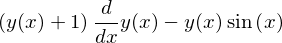

In [4]:
dgl = (1+y(x))*y(x).diff(x) - sin(x)*y(x)
dgl

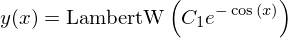

In [5]:
sol = dsolve(dgl)
sol

In [6]:
C1 = sol.rhs.atoms(Symbol).difference(dgl.atoms(Symbol)).pop()
C1

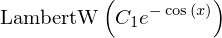

In [7]:
sol.rhs

In [8]:
myc1e = solve(sol.rhs.subs(x,0)-1)
myc1 = nsolve(sol.rhs.subs(x,0)-1,3)
(myc1- myc1e.pop()).n()

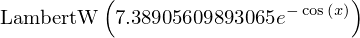

In [9]:
sol1 = sol.rhs.subs(C1,myc1)
sol1

In [10]:
sol1n = lambdify(x,re(sol1),modules=("numpy",{"LambertW":special.lambertw}))

In [11]:
myc1 = nsolve(sol.rhs.subs(x,0)-Rational(1,2),3)
myc1

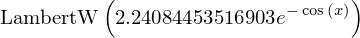

In [12]:
sol2 = sol.rhs.subs(C1,myc1)
sol2

In [13]:
sol2n = lambdify(x,re(sol2),modules=("numpy",{"LambertW":special.lambertw}))

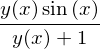

In [14]:
dglrhs = solve(dgl,y(x).diff(x)).pop()
dglrhs

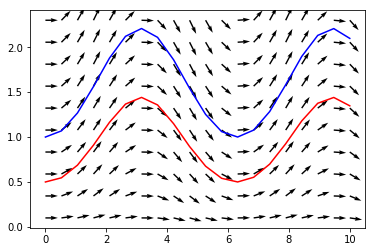

In [15]:
xn = np.linspace(0,10,20)
yn = np.linspace(0.1,2.3,10)
XX,YY = np.meshgrid(xn,yn)
vn = lambdify( (x,y(x)), dglrhs)
U = np.ones_like(XX)
V = vn(XX,YY)
plt.figure()
plt.plot(xn,sol2n(xn),'r',xn,sol1n(xn),'b')
plt.quiver(XX,YY,U,V ,angles='xy')
plt.show()